# **Explore Data Analysis**
---
Get insights of data with EDA

## **Import Package and Load the data**

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import joblib
import seaborn as sns
import numpy as np

In [2]:
X_train = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/X_train.csv")
y_train = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/y_train.csv")
X_test = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/X_test.csv")
y_test = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/y_test.csv")
data = joblib.load("D:/ML/INTRO ML/Project/joblib_train_test/data.csv")

## **Insight from whole data**

In [3]:
data.head(2)

,date,Usage,LagRP,LeadRP,CO2,LagPF,LeadPF,NSM,WStatus,Dweek,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load


### **Consumption KWh per Hour**

In [4]:
data["Hour"] = data["date"].dt.hour
data["Month"] = data["date"].dt.month
data.head(2)

,date,Usage,LagRP,LeadRP,CO2,LagPF,LeadPF,NSM,WStatus,Dweek,Load_Type,Hour,Month
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,0,1
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,0,1


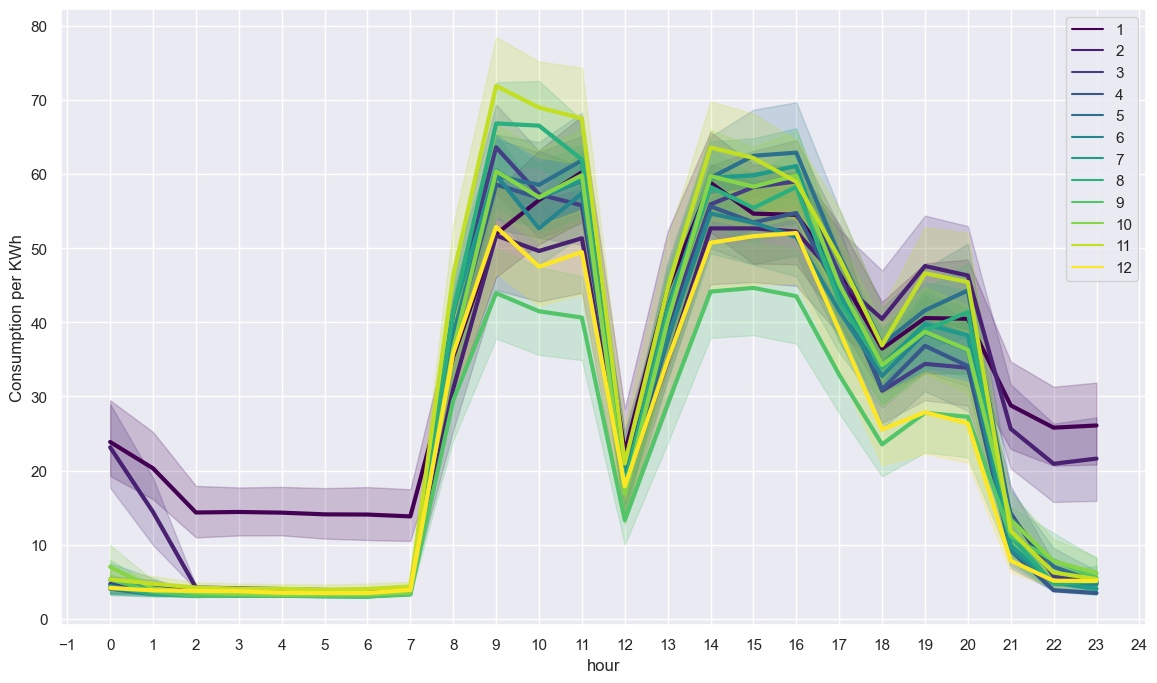

In [5]:
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=data, x ='Hour', y = 'Usage',
                  hue='Month', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Consumption per KWh')
plt.xlabel('hour')
plt.show()

### **Daily Consumption KWh**

<function matplotlib.pyplot.show(close=None, block=None)>

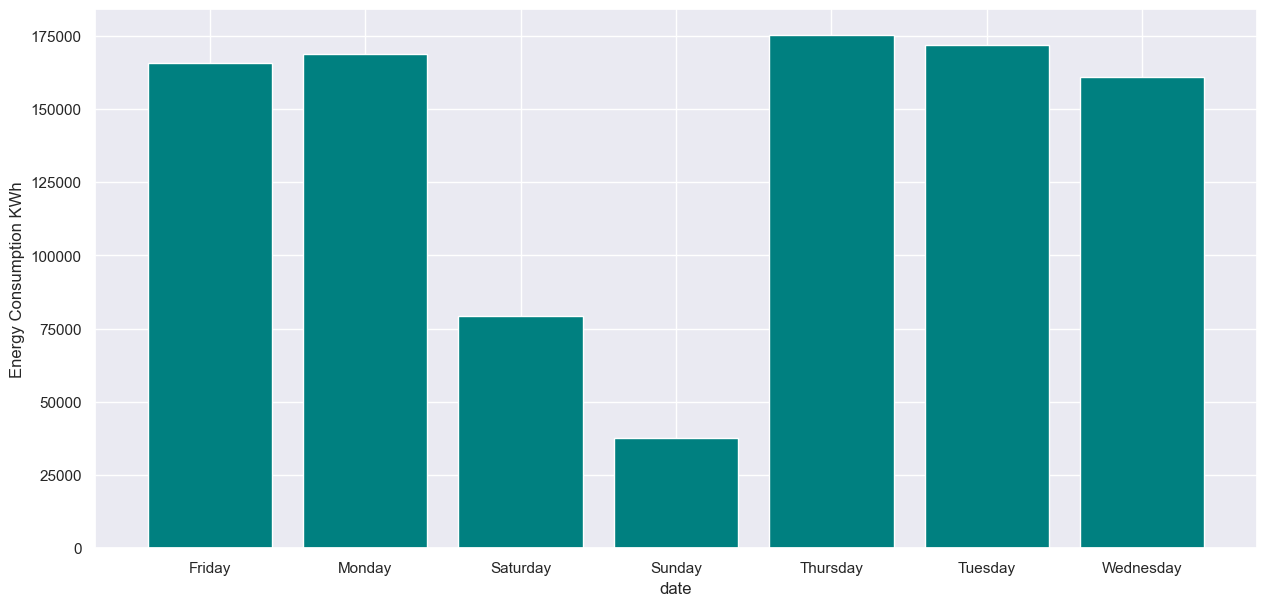

In [32]:
dialy_consume = data.groupby('Dweek')['Usage'].sum().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

ax.bar(dialy_consume['Dweek'], dialy_consume['Usage'], color = 'teal')

ax.set_xlabel('date')
ax.set_ylabel('Energy Consumption KWh')
plt.show

### **CO2 per Hour**

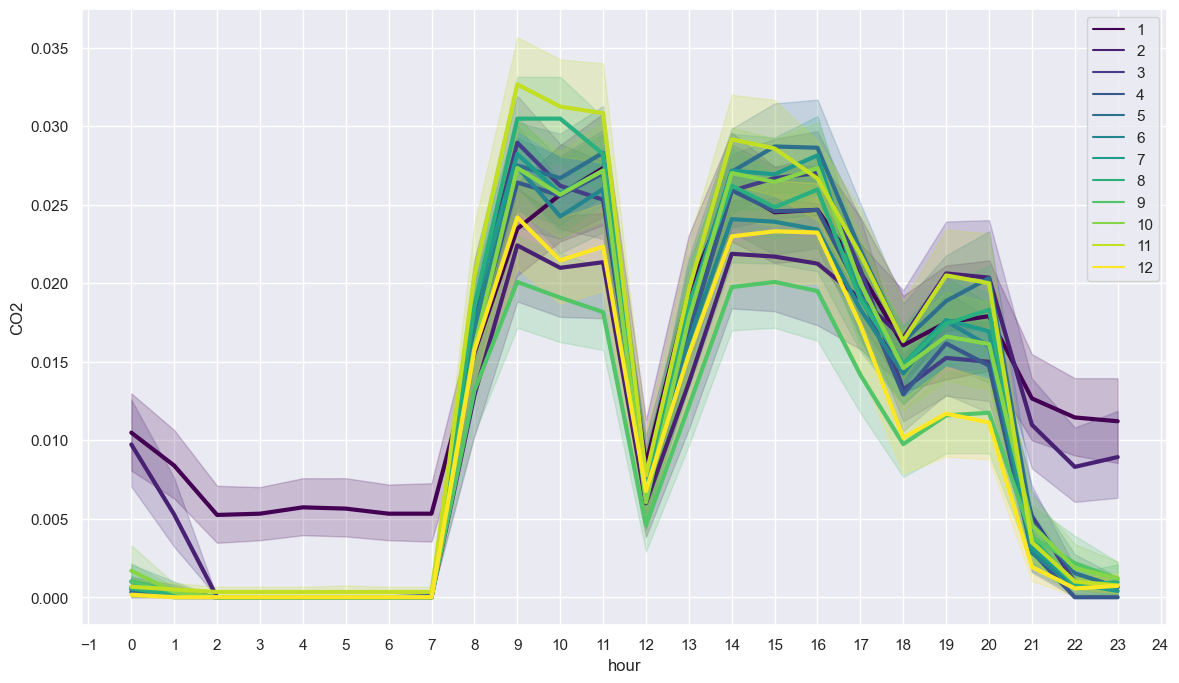

In [7]:
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=data, x ='Hour', y = 'CO2',
                  hue='Month', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('CO2')
plt.xlabel('hour')
plt.show()

### **Daily CO2 in 1 year**

<function matplotlib.pyplot.show(close=None, block=None)>

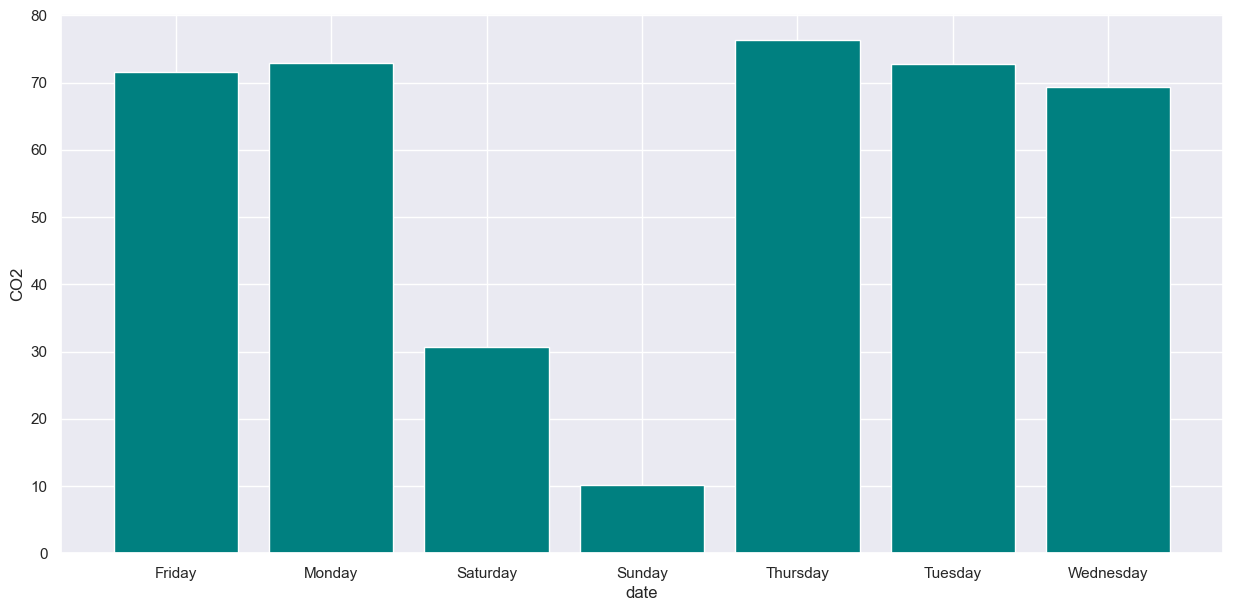

In [8]:
dialy_consume = data.groupby('Dweek')['CO2'].sum().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

ax.bar(dialy_consume['Dweek'], dialy_consume['CO2'], color = 'teal')

ax.set_xlabel('date')
ax.set_ylabel('CO2')
plt.show

### **Heatmap Consumption KWh**

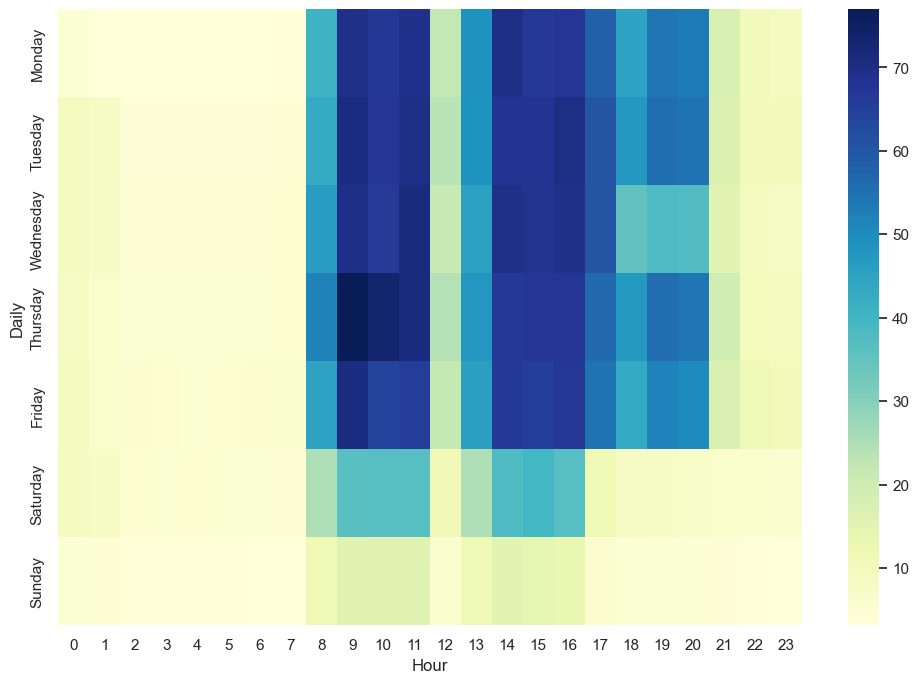

In [9]:
# Contoh data frame pivot_table
pivot_table = data.pivot_table(values='Usage', index='Dweek', columns='Hour')

# Urutkan kolom 'Dweek' sesuai dengan urutan hari
desired_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(desired_order)

# Buat heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, ax=ax)

ax.set_xlabel('Hour')
ax.set_ylabel('Daily')

plt.show()

## **Checking Distribution and Correlation at Data Training**

In [10]:
#create training data

eda_training = pd.merge(X_train, y_train, left_index = True, right_index = True)

In [16]:
eda_training.describe()

,LagRP,LeadRP,CO2,LagPF,LeadPF,NSM,Usage
count,28032.000000,28032.000000,28032.000000,28032.000000,28032.000000,28032.000000,28032.000000
mean,13.121777,3.922060,0.011608,80.701046,84.203931,42898.298373,27.567949
std,16.399235,7.482352,0.016218,18.870726,30.592752,24888.627747,33.579986
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.230000,0.000000,0.000000,63.610000,99.660000,21600.000000,3.240000
50%,5.000000,0.000000,0.000000,88.100000,100.000000,43200.000000,4.570000
75%,22.970000,2.230000,0.020000,99.102500,100.000000,64800.000000,51.480000
max,96.910000,27.650000,0.070000,100.000000,100.000000,85500.000000,157.180000


### **Distribution**

In [12]:
def kdeplot(data):
    """
    This function is used to check the distribution of numeric data.
    :param data: pandas DataFrame containing numeric columns
    """
    numeric_cols = data.select_dtypes(include=[int, float]).columns

    fig, axs = plt.subplots(nrows=len(numeric_cols), figsize=(8, len(numeric_cols)*4))
    
    for i, col in enumerate(numeric_cols):
        sns.kdeplot(data=data, x=col, color="blue", ax=axs[i])
        
    plt.show()

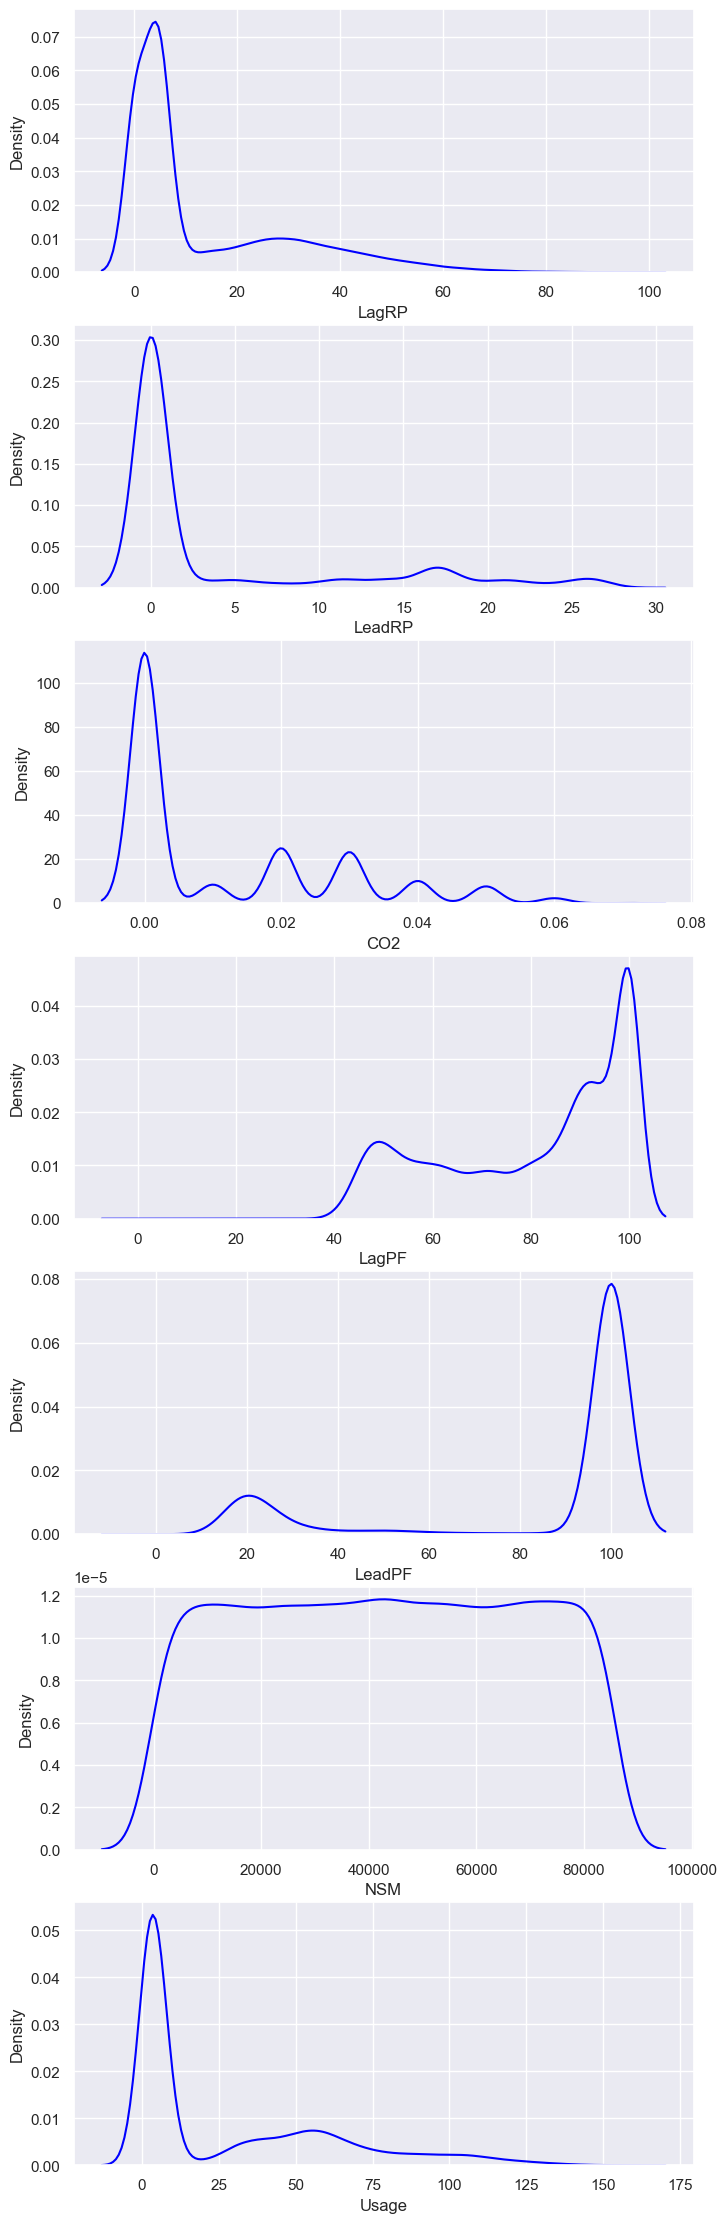

In [13]:
kdeplot(eda_training)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def boxplot(data):
    """
    This function is used to check data outliers.
    Args:
        data (pandas DataFrame): The DataFrame containing the data.
    Returns:
        boxplot (matplotlib.axes._subplots.AxesSubplot): The boxplot of the numeric columns.
    """
    numeric_cols = data.select_dtypes(include=['int', 'float']).columns
    fig, axs = plt.subplots(nrows=len(numeric_cols), figsize=(8, len(numeric_cols)*4))
    for i, col in enumerate(numeric_cols):
        boxplot = sns.boxplot(data=data, x=col, color="blue", ax=axs[i])
    return boxplot

<Axes: xlabel='Usage'>

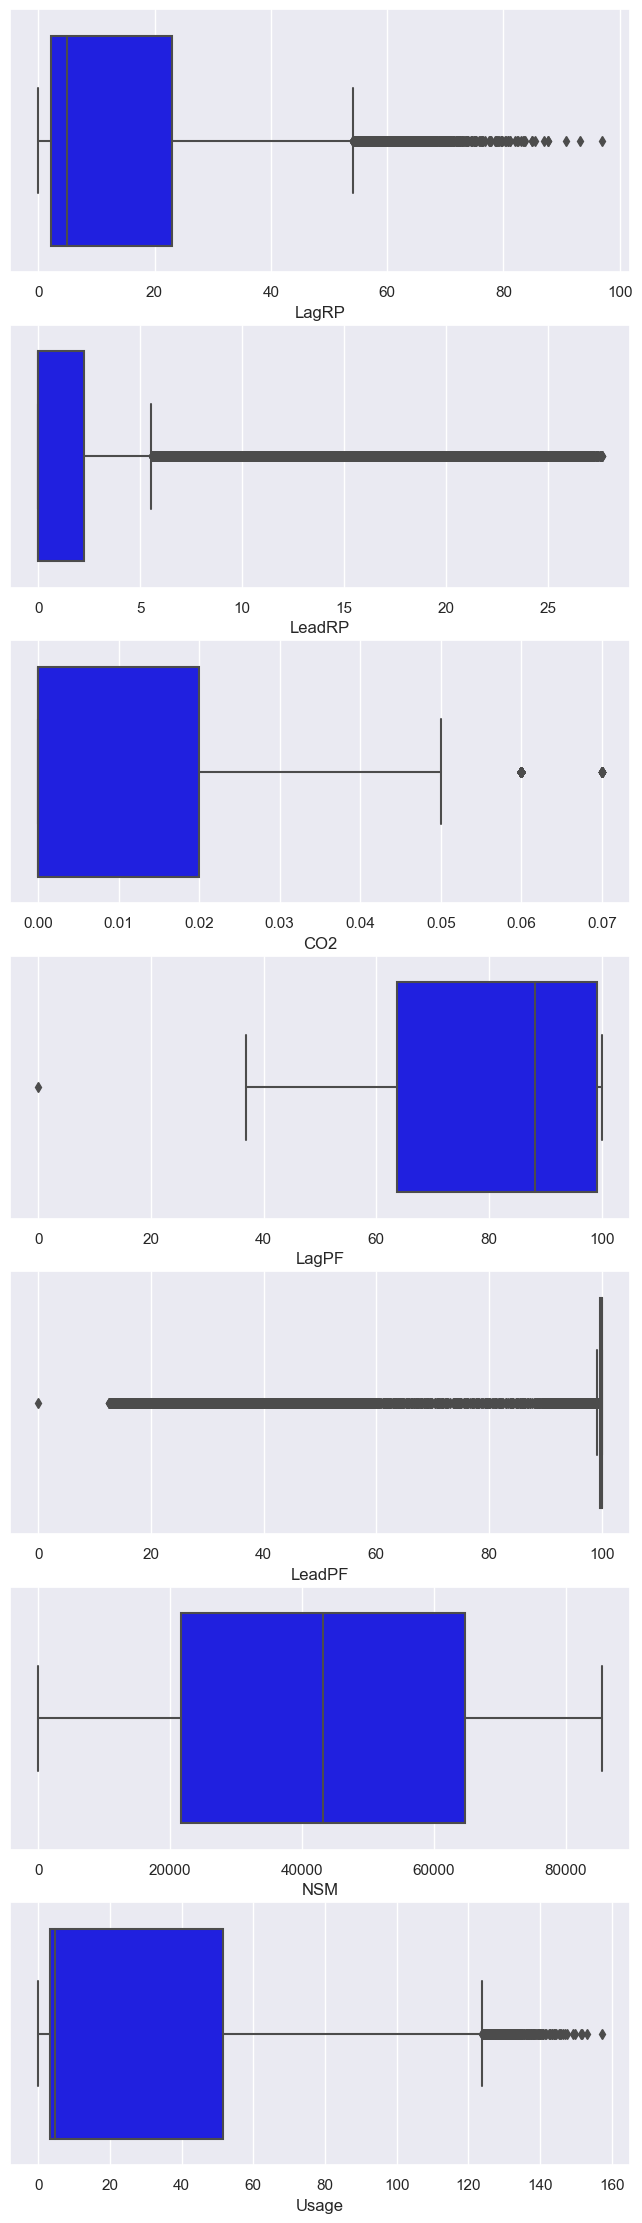

In [15]:
boxplot(eda_training)

<function matplotlib.pyplot.show(close=None, block=None)>

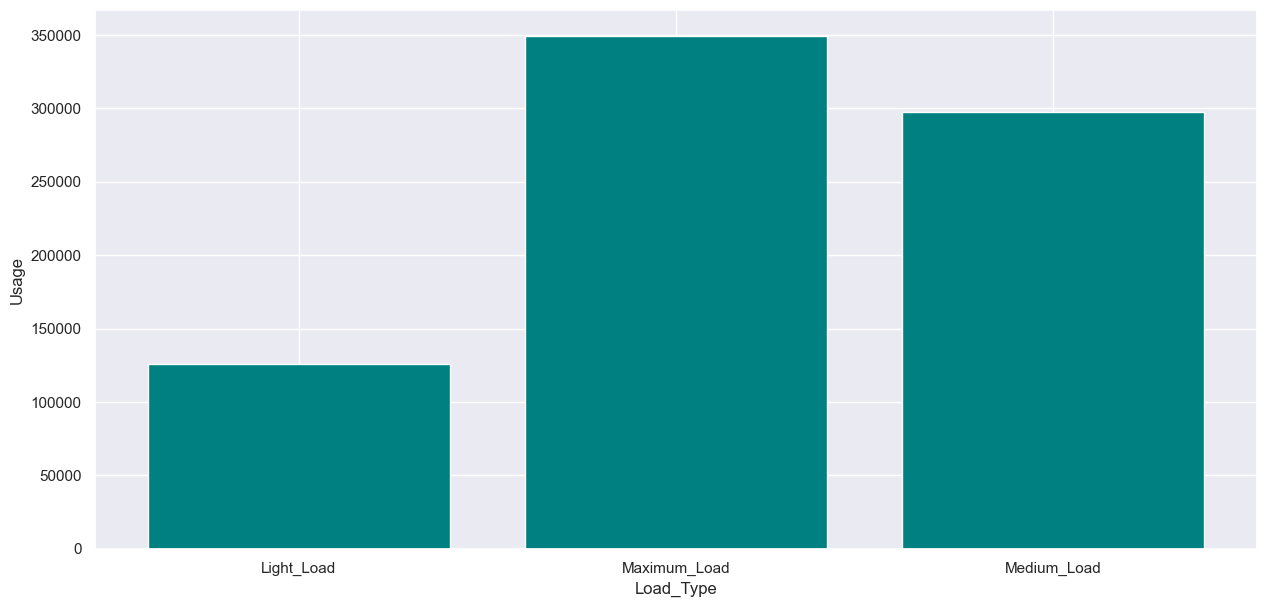

In [20]:
dialy_consum = eda_training.groupby('Load_Type')['Usage'].sum().reset_index()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

ax.bar(dialy_consum['Load_Type'], dialy_consum['Usage'], color = 'teal')

ax.set_xlabel('Load_Type')
ax.set_ylabel('Usage')
plt.show

### **Correlation**

In [25]:
from scipy.stats import pearsonr

def calculate_pearson_correlations(data, dependent_variable):

    numeric_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()
    correlations = {}
    
    for independent_variable in numeric_cols:
        correlation_coefficient, _ = pearsonr(data[dependent_variable], data[independent_variable])
        correlations[independent_variable] = correlation_coefficient
        print(f"Pearson correlation for {independent_variable}: {correlation_coefficient:.3f}")
    
    return correlations

In [26]:
correlations = calculate_pearson_correlations(eda_training, 'Usage')
print(correlations)

Pearson correlation for LagRP: 0.896
Pearson correlation for LeadRP: -0.329
Pearson correlation for CO2: 0.988
Pearson correlation for LagPF: 0.383
Pearson correlation for LeadPF: 0.357
Pearson correlation for NSM: 0.228
Pearson correlation for Usage: 1.000
{'LagRP': 0.8959501493873614, 'LeadRP': -0.32854161829528, 'CO2': 0.9880629579263984, 'LagPF': 0.38262414638438313, 'LeadPF': 0.3569174526660493, 'NSM': 0.22807126789195475, 'Usage': 1.0}


C:\Users\yusril\AppData\Local\Temp\ipykernel_13092\3170501910.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = eda_training.corr(method='pearson')


<Axes: >

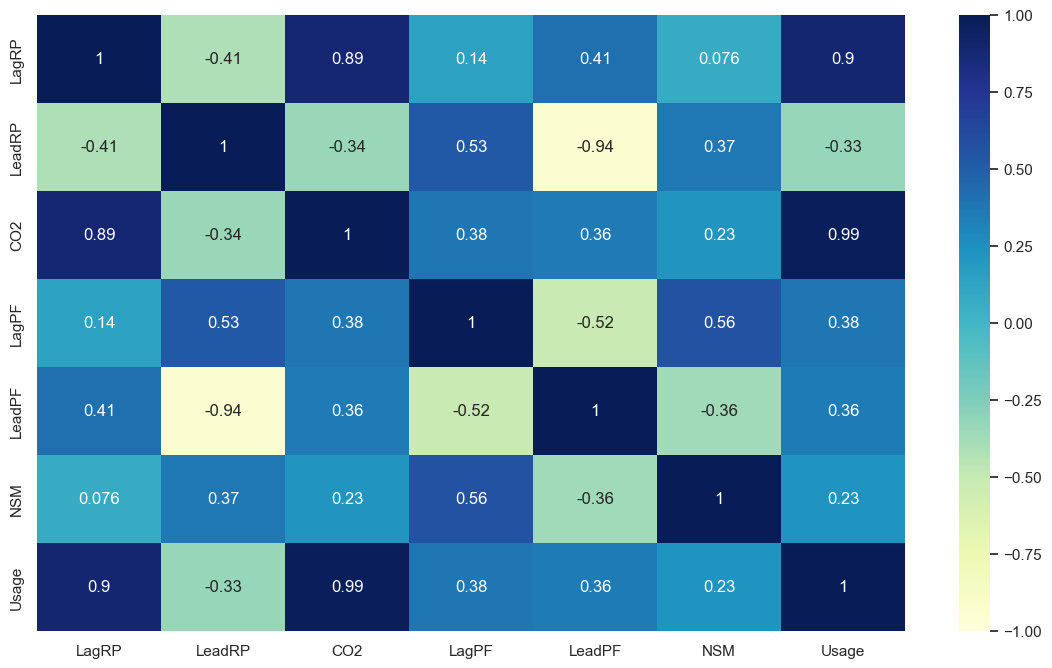

In [28]:
corr = eda_training.corr(method='pearson')
sns.heatmap(corr, cmap='YlGnBu', annot=True, vmin=-1, vmax=1)

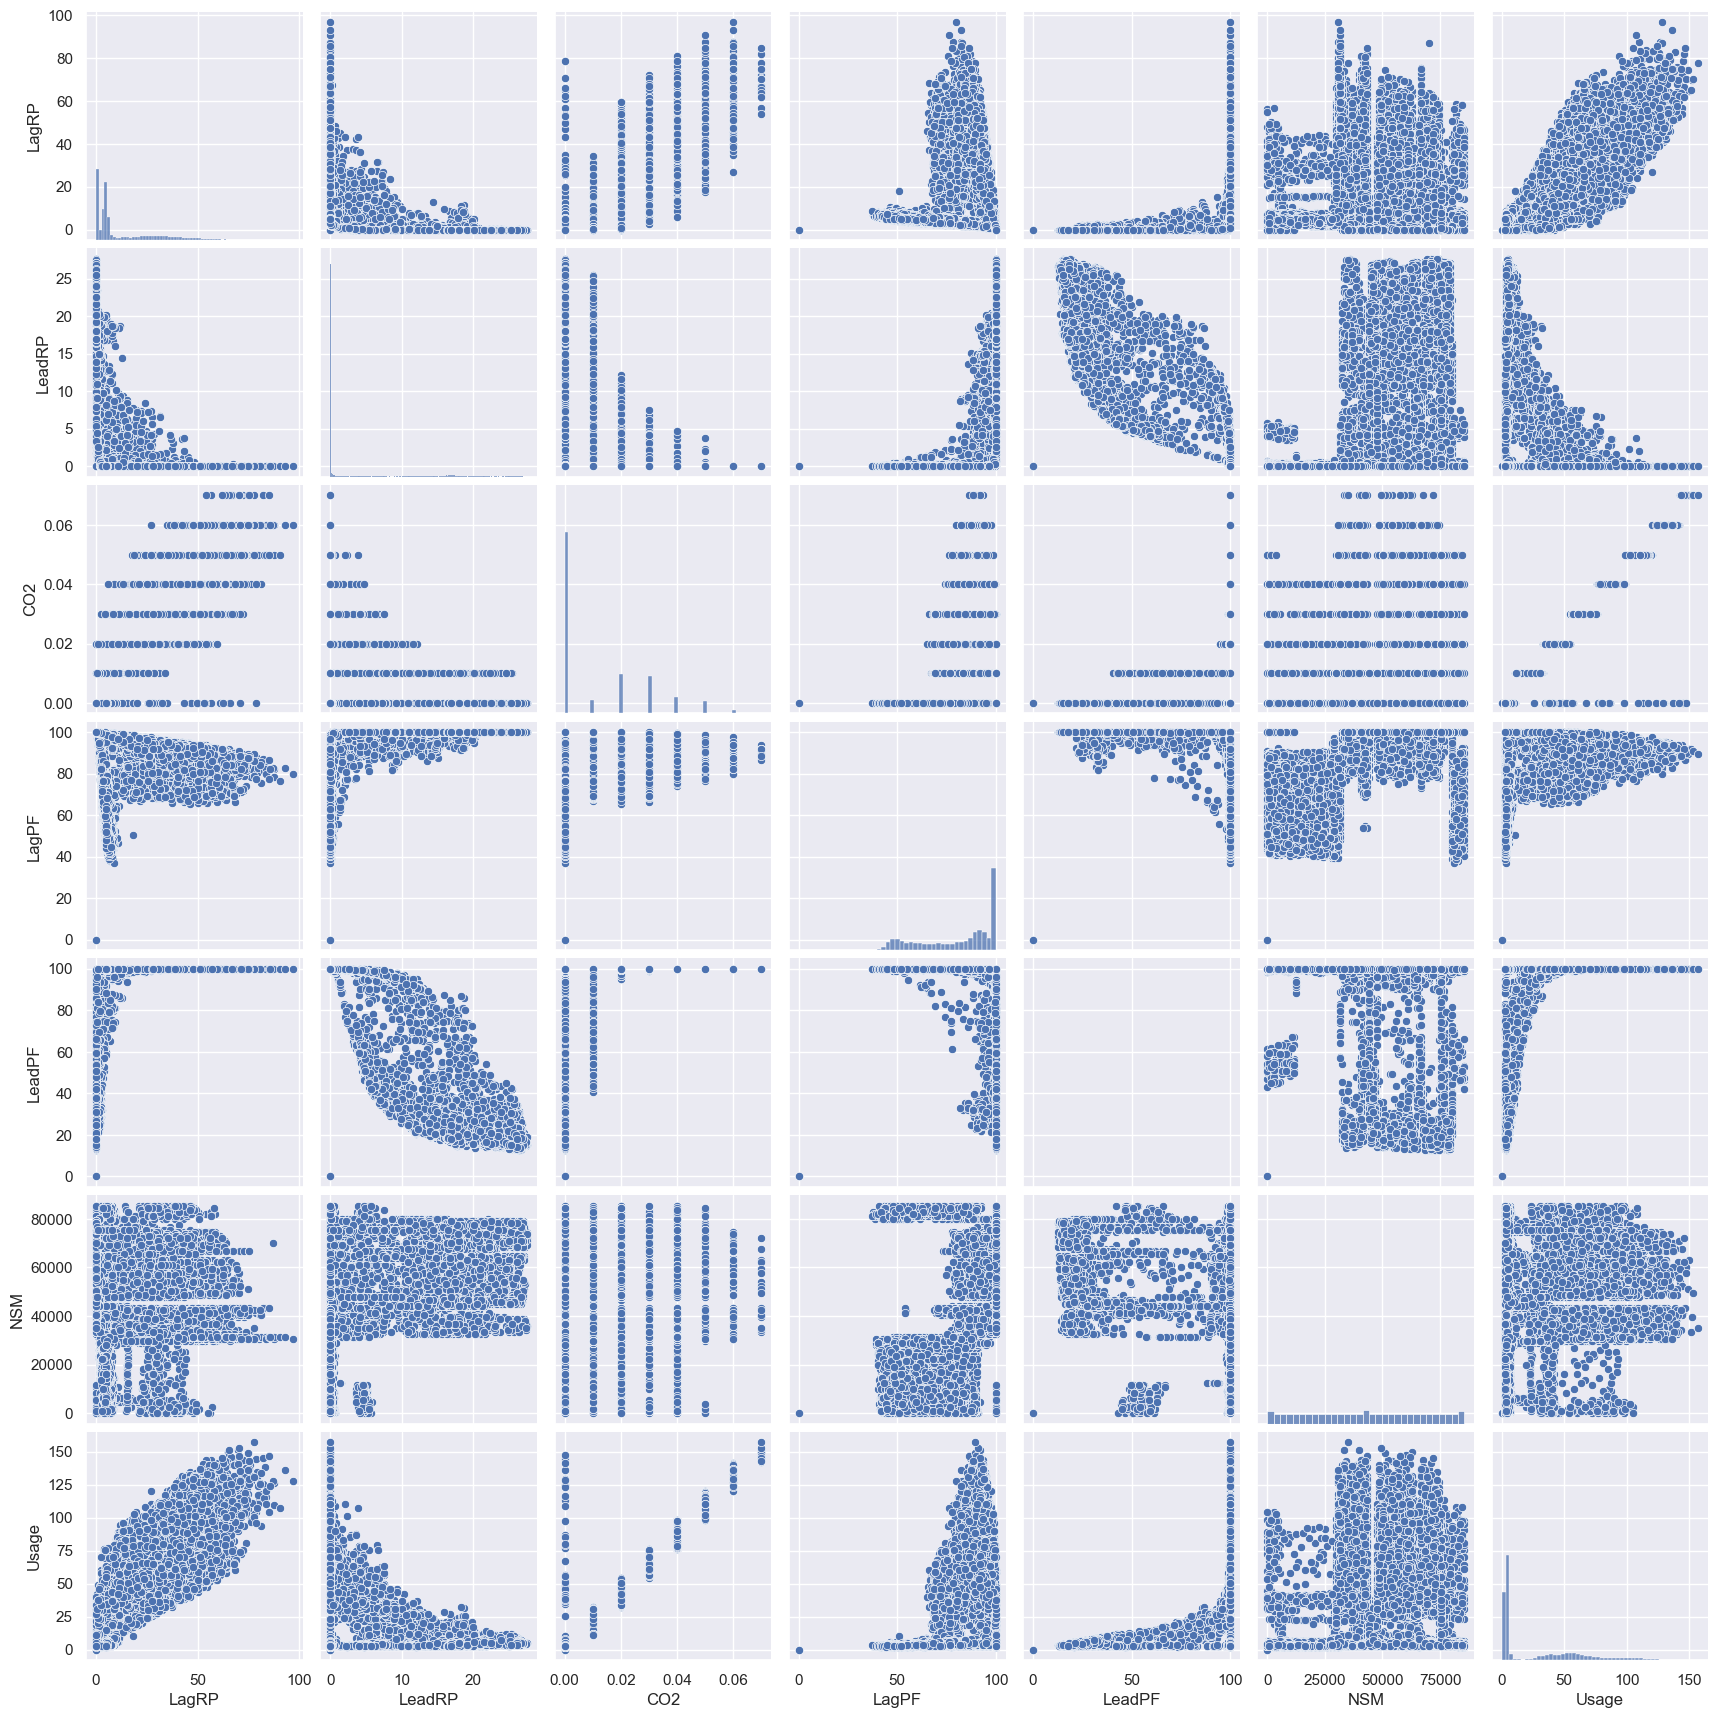

In [29]:
sns.pairplot(eda_training)